<a href="https://colab.research.google.com/github/SxBxcoder/Brain-Tumour-Classification-Using-Deep-Learning-And-XAI/blob/main/Model_1_Classification/Tumorpart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%tensorflow_version 2.x
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

import zipfile
with zipfile.ZipFile("brain-tumor-mri-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

train_path = "/content/dataset/Training"
test_path = "/content/dataset/Testing"

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

#Preprocess training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150), #Adjusting the target size as needed
    batch_size=32,
    class_mode='categorical',
    classes=class_names
)

#Preprocess testing data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150), #Adjusting the target size as needed
    batch_size=32,
    class_mode='categorical',
    classes=class_names,
    shuffle=False  #Keep order for evaluation
)
#Defining the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), #Input shapes adjusted for color images
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(class_names), activation='softmax') #Output layer with no. of classes
])

#Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#Training the model
model.fit(train_generator, epochs=10)

#Evaluating the model
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print('Test accuracy:', test_acc)

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
  0% 0.00/149M [00:00<?, ?B/s]
100% 149M/149M [00:00<00:00, 1.90GB/s]
Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 163s 903ms/step - accuracy: 0.5385 - loss: 1.0224
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 160s 896ms/step - accuracy: 0.8006 - loss: 0.5089
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 894ms/step - accuracy: 0.8475 - loss: 0.3959
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 161s 899ms/step - accuracy: 0.8826 - loss: 0.3177
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 160s 891ms/step - accuracy: 0.9009 - loss: 0.2697
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 167s 934ms/step - accuracy: 0.9140 - loss: 0.2282
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 164s 915ms/step - accuracy: 0.9265 - loss: 0.1967
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 908ms/step - accuracy: 0.9380 - loss: 0.1681
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 168s 940ms/step - accuracy: 0.9507 - loss: 0.1353
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 166s 925ms/step - accuracy: 0.9579 - loss: 0.1138
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 280ms/step - accuracy: 0.9425 - loss: 0.1381
Test accuracy: 0.949656

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


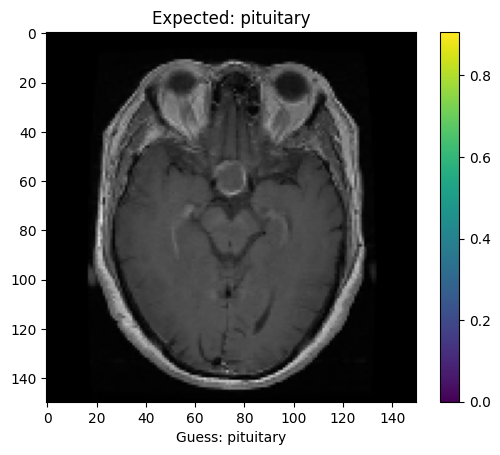

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

def predict(model, image_array, correct_label):
    prediction = model.predict(np.expand_dims(image_array, axis=0)) #Adding the batch dimension
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class_index]
    true_class_name = class_names[correct_label]

    show_image(image_array, true_class_name, predicted_class_name)

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img)
    plt.title(f"Expected: {label}")
    plt.xlabel(f"Guess: {guess}")
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number(max_index):
    while True:
        num_str = input(f"Pick a number between 0 and {max_index}: ")
        if num_str.isdigit():
            num = int(num_str)
            if 0 <= num <= max_index:
                return num
        else:
            print("Invalid input. Please enter a number.")

#Getting the labels from the test generator
test_labels = test_generator.classes
#Getting the filenames from the test generator
test_filenames = test_generator.filenames
#Getting the total number of test samples
num_test_samples = len(test_generator.filenames)

#Taking a random index input from the test set
import random
random_index = random.randint(0, num_test_samples - 1)
img_path = os.path.join(test_path, test_filenames[random_index])
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0 #To normalize the pixel values

label = test_labels[random_index]
predict(model, img_array, label)

#To ask the user to pick an input index:
#num = get_number(num_test_samples - 1)
#img_path = os.path.join(test_path, test_filenames[num])
#img = image.load_img(img_path, target_size=(150, 150))
#img_array = image.img_to_array(img) / 255.0
#label = test_labels[num]
#predict(model, img_array, label)